In [1]:
from sympy import *
from sympy.vector import *
init_printing()
import matplotlib.pyplot as plt
import pandas

In [73]:
v_mid = 0.655
n_1 = 120
frac_l_bc_l_ab = 4.36
frac_l_bs2_l_bc = 0.275
d_4 = 0.99
p_max = 25.0
p_min = 0.5
g_2 = 6.0
g_3 = 18.0
l_bs3 = 0.16
j_s2 = 0.14
delta = Rational(1, 22)
j_o1_sht = 0.032
gd_sqr = 0.042
gd_sqr_1 = 0.006
j_red_pr = 0.20
phi_1 = 210
z_15 = 10
z_16 = 19
m = 4.0
beta = 25
k = 3
i_8_12 = 9.4
h = 0.016
alpha_dop = 24
delta_p = 330
frac_p_r_0 = 0.21

In [3]:
l_ab  = v_mid / (4 * n_1 / 60)
l_bc = frac_l_bc_l_ab * l_ab


In [4]:
l_ab

In [5]:
l_bc

In [6]:
phi = symbols('varphi', rational=True)
sys = CoordSys3D('oxyz')
point_a =  sys.origin
point_b = point_a.locate_new('b', -l_ab * cos(phi) * sys.i + l_ab * sin(phi) * sys.j)
x_c = symbols('x_c')
point_c = point_a.locate_new('c_1', x_c * sys.i)
s_1 = solve([(point_c.position_wrt(point_b)).magnitude() - l_bc],[x_c])
point_c = point_a.locate_new('c', s_1[0][0] * sys.i)

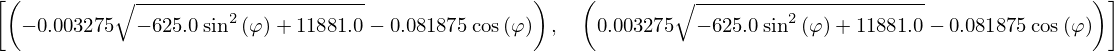

In [7]:
s_1

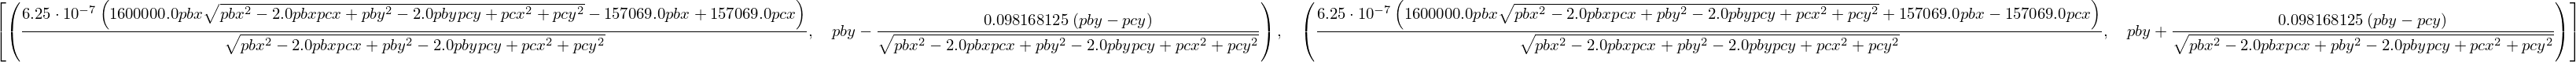

In [8]:
l_bs_2 = frac_l_bs2_l_bc * l_bc
x_s2, y_s2 = symbols('x_s2, y_s2')
pbx, pby, pcx, pcy = symbols('pbx, pby, pcx, pcy')
pbb = point_a.locate_new('pbb', pbx * sys.i + pby * sys.j)
point_s2 = point_a.locate_new('s_2_1', x_s2 * sys.i + y_s2 * sys.j)
s1 = solve([(point_s2.position_wrt(pbb)).magnitude() - l_bs_2, 
           (pbx - x_s2) / (pbx - pcx) - (pby - y_s2) / (pby - pcy)],[x_s2, y_s2])
s1

In [9]:
l_bs_2

In [10]:
point_s2 = point_a.locate_new('s_2', s1[0][0].subs({pbx: point_b.express_coordinates(sys)[0], 
                                                   pby: point_b.express_coordinates(sys)[1],
                                                   pcx: point_c.express_coordinates(sys)[0],
                                                   pcy: point_c.express_coordinates(sys)[1]}) * sys.i + s1[0][1].subs({pbx: point_b.express_coordinates(sys)[0], 
                                                   pby: point_b.express_coordinates(sys)[1],
                                                   pcx: point_c.express_coordinates(sys)[0],
                                                   pcy: point_c.express_coordinates(sys)[1]}) * sys.j)

In [11]:
point_s3 = point_c.locate_new('s_3', -l_bs3 * sys.i)

In [12]:
vec_ab = point_b.position_wrt(point_a)
vec_ac = point_c.position_wrt(point_a)
vec_as2 = point_s2.position_wrt(point_a)
vec_as3 = point_s3.position_wrt(point_a)
phi_2 = acos(l_ab * sin(phi) / l_bc)

In [13]:
omega_mid_1 = 2 * pi * n_1 / 60
omega_q2 = diff(phi_2, phi)
v_qb = simplify(diff(vec_ab, phi).magnitude())
v_qc = diff(vec_ac, phi).to_matrix(sys)[0]
v_qs2 = diff(vec_as2, phi)
v_qs3 = diff(vec_as3, phi)

In [14]:
omega_mid_1.n()

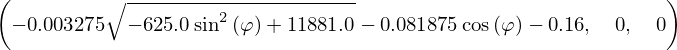

In [15]:
point_s3.express_coordinates(sys)

In [16]:
l_bs_2

In [93]:
f_min = (0.049 * 10 ** 6 * pi * d_4 ** 2 / 4).n()
f_min

In [94]:
f_max = (2.451 * 10 ** 6 * pi * d_4 ** 2 / 4).n()
f_max

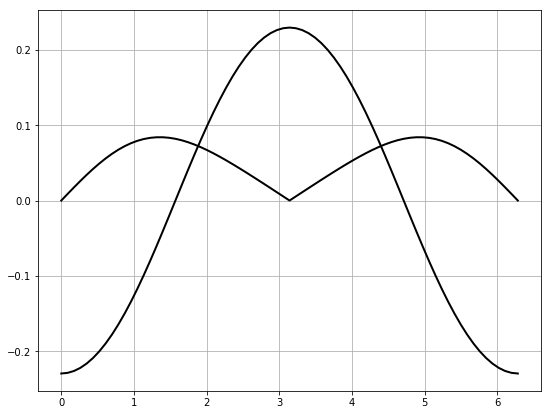

In [19]:
varx = [i / 360 * 2 * pi for i in range(0, 365, 5)]
vary1 = [abs(v_qc).subs(phi, i).n(3) for i in varx]
vary2 = [omega_q2.subs(phi, i).n(3) for i in varx]

fig_01 = plt.figure(figsize = [9.00, 7.00])
plt.plot(varx, vary1, linewidth = 2, color = 'black')
plt.grid(True)
plt.plot(varx, vary2, linewidth = 2, color = 'black')
plt.show()

In [20]:
#fig_01.savefig('c=c(varphi)')

In [21]:
v_qs2x = v_qs2.to_matrix(sys)[0]
v_qs2y = v_qs2.to_matrix(sys)[1]
v_qs2_s = (v_qs2x ** 2 + v_qs2y ** 2) ** 0.5
u_21 = omega_q2

In [22]:
table = []
for i in range(0,390,30):
    table.append([i, v_qs2x.subs(phi, i / 360 * 2 * pi).n(3), v_qs2y.subs(phi, i / 360 * 2 * pi).n(3), v_qs2_s.subs(phi, i / 360 * 2 * pi).n(3), v_qc.subs(phi, i / 360 * 2 * pi).n(3), u_21.subs(phi, i / 360 * 2 * pi).n(3)])
df = pandas.DataFrame(table)
print(df.to_latex())

\begin{tabular}{lrlllll}
\toprule
{} &    0 &        1 &         2 &       3 &        4 &       5 \\
\midrule
0  &    0 &        0 &    0.0594 &  0.0594 &        0 &  -0.229 \\
1  &   30 &   0.0432 &    0.0514 &  0.0671 &   0.0491 &  -0.200 \\
2  &   60 &   0.0732 &    0.0297 &  0.0790 &   0.0792 &  -0.117 \\
3  &   90 &   0.0819 &  6.13e-19 &  0.0819 &   0.0819 &       0 \\
4  &  120 &   0.0686 &   -0.0297 &  0.0748 &   0.0626 &   0.117 \\
5  &  150 &   0.0387 &   -0.0514 &  0.0643 &   0.0328 &   0.200 \\
6  &  180 &        0 &   -0.0594 &  0.0594 &        0 &   0.229 \\
7  &  210 &  -0.0387 &   -0.0514 &  0.0643 &  -0.0328 &   0.200 \\
8  &  240 &  -0.0686 &   -0.0297 &  0.0748 &  -0.0626 &   0.117 \\
9  &  270 &  -0.0819 &  6.13e-19 &  0.0819 &  -0.0819 &       0 \\
10 &  300 &  -0.0732 &    0.0297 &  0.0790 &  -0.0792 &  -0.117 \\
11 &  330 &  -0.0432 &    0.0514 &  0.0671 &  -0.0491 &  -0.200 \\
12 &  360 &        0 &    0.0594 &  0.0594 &        0 &  -0.229 \\
\bottomrule
\end{ta

In [133]:
m_c_pr = Integral(-1 * f_min * v_qc, (phi, 0, pi)).doit()  + 1 * Integral(f_max * v_qc, (phi, pi, 2 * pi)).doit()

In [134]:
m_c_pr

In [135]:
m_d_pr = - m_c_pr / (2 * pi).n(3)

In [136]:
m_d_pr

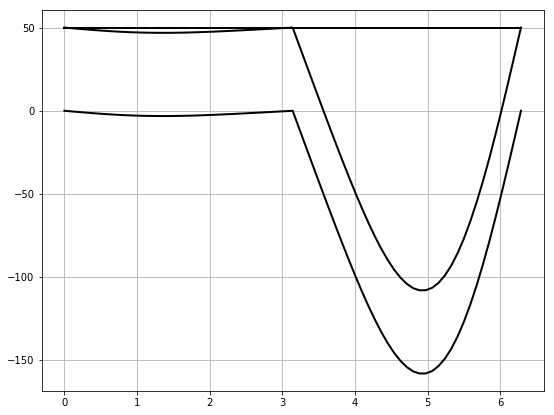

In [27]:
vary1 = [(v_qc * f_min * -1).subs(phi, i).n(3) / 1000 if i < pi else (f_max * v_qc).subs(phi, i).n(3) / 1000 for i in varx]
vary2 = [m_d_pr / 1000 for i in varx]
vary3 = [vary1[i] + vary2[i] for i in range(len(vary1))]

fig_01 = plt.figure(figsize = [9.00, 7.00])
plt.plot(varx, vary1, linewidth = 2, color = 'black')
plt.grid(True)
plt.plot(varx, vary2, linewidth = 2, color = 'black')
plt.plot(varx, vary3, linewidth = 2, color = 'black')
plt.show()

In [28]:
#fig_01.savefig('moments')

In [29]:
17.3 / 50000

In [30]:
a1 = (pi * 0.99 ** 2 / 4).n(4)
(33.265 / a1 * 10 ** -3).n(5)

In [31]:
m_g2_pr = simplify(v_qs2.magnitude() * g_2)

In [32]:
a1 = integrate(v_qc, phi)
c1, c2 = symbols('c_1, c_2')
t1 = solve([-1 * a1.subs(phi,0) * f_min + c1, a1.subs(phi, pi) * f_max - a1.subs(phi, pi) * f_min - 4000 + c2], [c1, c2])
t1

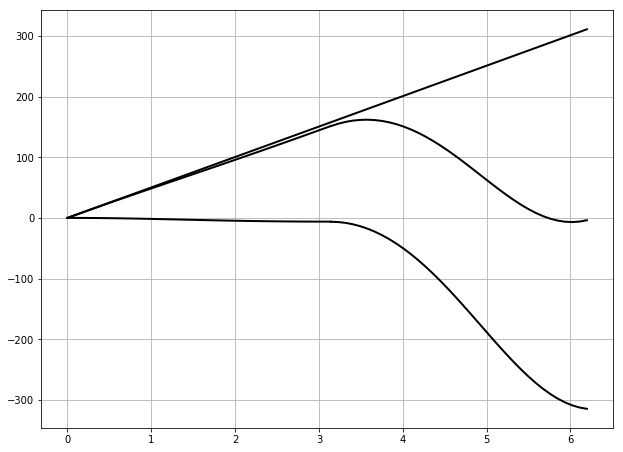

In [33]:
a1 = integrate(v_qc, phi)
varx = [i / 360 * 2 * pi.n(6) for i in range(0, 360, 5)]
vary1 = [-1 * a1.subs(phi, i) * f_min / 1000 + t1[c1] / 1000 for i in varx[0: len(varx) // 2 + 1:1]]
vary2 = [a1.subs(phi, i) * f_max / 1000 + t1[c2] / 1000 for i in varx[len(varx) // 2:]]
a2 = (Integral(m_d_pr / 1000, phi)).doit()
vary3 = [a2.subs(phi, i) for i in varx]
vary4 = [vary1[i] + vary3[i] for i in range(len(vary1))]
vary5 = [vary2[i] + vary3[i + len(vary4) - 1] for i in range(len(vary2))]

fig = plt.figure(figsize = [10.24, 7.68])
plt.plot(varx[0:len(varx) // 2 + 1:1], vary1, linewidth = 2, color = 'black')
plt.grid(True)
plt.plot(varx[len(varx) // 2:], vary2, linewidth = 2, color = 'black')
plt.plot(varx, vary3, linewidth = 2, color = 'black')
plt.plot(varx[0:len(varx) // 2 + 1:], vary4, linewidth = 2, color = 'black')
plt.plot(varx[len(varx) // 2:], vary5, linewidth = 2, color = 'black')
#plt.plot(varx, vary, linewidth = 2, color = 'green')

plt.show()


In [34]:
#fig.savefig('A(m), A(sum)')

In [74]:
j_pr2 = j_s2 * omega_q2 ** 2 + g_2 * v_qs2_s ** 2

In [75]:
j_pr3 = g_3 * abs(v_qc) ** 2

In [77]:
j_pr2gr = j_pr2 + j_pr3

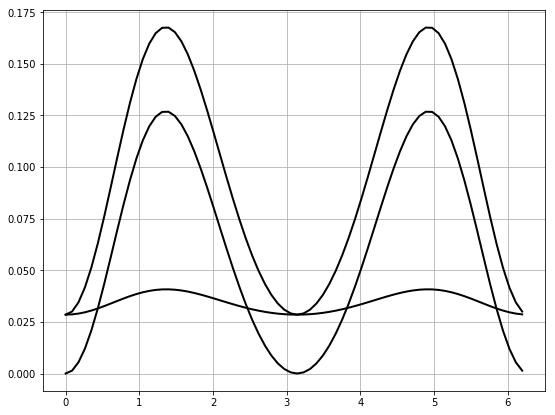

In [78]:
fig2 = plt.figure(figsize = [9.00, 7.00])
varx = [i / 360 * 2 * pi.n(6) for i in range(0, 360, 5)]
vary1 = [j_pr2.subs(phi, i) for i in varx]
vary2 = [j_pr3.subs(phi, i) for i in varx]
vary3 = [j_pr2gr.subs(phi, i) for i in varx]

plt.plot(varx, vary1, linewidth = 2, color = 'black')
plt.grid(True)
plt.plot(varx, vary2, linewidth = 2, color = 'black')
plt.plot(varx, vary3, linewidth = 2, color = 'black')

plt.show()

In [39]:
#fig2.savefig('j_2_pr')

In [40]:
table = []
for i in range(0,390,30):
    table.append([i, (f_min * v_qc * -1).subs(phi, i / 360 * 2 * pi).n(5) if i <= pi else (f_max * v_qc * -1).subs(phi, i / 360 * 2 * pi).n(5), (f_min * v_qc * -1 + m_d_pr).subs(phi, i / 360 * 2 * pi).n(5) if i <= pi else (f_max * v_qc + m_d_pr).subs(phi, i / 360 * 2 * pi).n(5)])
df = pandas.DataFrame(table)
print(df.to_latex())

\begin{tabular}{lrll}
\toprule
{} &    0 &           1 &           2 \\
\midrule
0  &    0 &           0 &      50153. \\
1  &   30 &     -92680. &   1.4283e+5 \\
2  &   60 &  -1.4943e+5 &   1.9959e+5 \\
3  &   90 &  -1.5447e+5 &   2.0463e+5 \\
4  &  120 &  -1.1812e+5 &   1.6828e+5 \\
5  &  150 &     -61794. &   1.1195e+5 \\
6  &  180 &           0 &      50153. \\
7  &  210 &      61794. &     -11640. \\
8  &  240 &   1.1812e+5 &     -67971. \\
9  &  270 &   1.5447e+5 &  -1.0432e+5 \\
10 &  300 &   1.4943e+5 &     -99278. \\
11 &  330 &      92680. &     -42527. \\
12 &  360 &           0 &      50153. \\
\bottomrule
\end{tabular}



In [41]:
table = []
for i in range(0,390,30):
    table.append([i, j_pr2.subs(phi, i).n(5), j_pr3.subs(phi, i).n(5), j_pr2gr.subs(phi, i).n(5)])
df = pandas.DataFrame(table)
print(df.to_latex())

\begin{tabular}{lrlll}
\toprule
{} &    0 &         1 &          2 &         3 \\
\midrule
0  &    0 &  0.021878 &          0 &  0.021878 \\
1  &   30 &  0.040574 &    0.12650 &   0.16708 \\
2  &   60 &  0.023149 &  0.0068385 &  0.029987 \\
3  &   90 &  0.034715 &   0.077249 &   0.11196 \\
4  &  120 &  0.029512 &   0.057449 &  0.086961 \\
5  &  150 &  0.033141 &   0.083345 &   0.11649 \\
6  &  180 &  0.031716 &   0.057328 &  0.089044 \\
7  &  210 &  0.024938 &   0.016729 &  0.041667 \\
8  &  240 &  0.039808 &    0.12500 &   0.16481 \\
9  &  270 &  0.022607 &  0.0056206 &  0.028228 \\
10 &  300 &  0.040097 &    0.11935 &   0.15945 \\
11 &  330 &  0.022114 &  0.0012621 &  0.023376 \\
12 &  360 &  0.037404 &   0.096645 &   0.13405 \\
\bottomrule
\end{tabular}



In [42]:
c1, c2 = symbols('c_1, c_2')
t1 = solve([-1 * a1.subs(phi,0) * f_min + c1, a1.subs(phi, pi) * f_max - a1.subs(phi, pi) * f_min - 4000 + c2], [c1, c2])
a1 = integrate(v_qc, phi)
a2 = (Integral(m_d_pr, phi)).doit()
a_phi = (-1 * a1 * f_min + t1[c1] + a2, a1 * f_max + t1[c2] + a2)

In [43]:
t_2 = j_pr2gr * omega_mid_1 ** 2 / 2

In [44]:
arr_phi = [(i / 360 * 2 * pi).n(3) for i in range(0, 360, 5)]
delta_t_1 = [(a_phi[0].subs(phi, i) - t_2.subs(phi, i)).n(3) if i < pi else (a_phi[1].subs(phi, i) - t_2.subs(phi, i)).n(3) for i in arr_phi]

In [45]:
t_max = max(delta_t_1)
t_max

In [46]:
t_min = min(delta_t_1)
t_min

In [58]:
phi_1, phi_2 = arr_phi[delta_t_1.index(t_max)], arr_phi[delta_t_1.index(t_min)]

In [47]:
delta_t = t_max - t_min

In [48]:
delta_t

In [49]:
delta

In [60]:
j_pr1 = (delta_t - delta * (t_2.subs(phi, phi_1).n(3) - t_2.subs(phi, phi_2))) / (omega_mid_1 ** 2 * delta)
j_pr1.n(4)

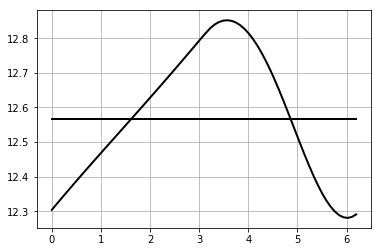

In [51]:
fig3 = plt.figure()
varx = arr_phi
vary1 = [(i - (t_max + t_min) / 2) / (omega_mid_1 * j_pr1.n(4)) + omega_mid_1 for i in delta_t_1]

plt.plot(varx, vary1, linewidth = 2, color = 'black')
plt.plot(varx, [omega_mid_1 for i in varx], linewidth = 2, color = 'black')
plt.grid(True)

plt.show()

In [52]:
max(vary1).n(5)

In [53]:
#fig3.savefig('delta_omega')

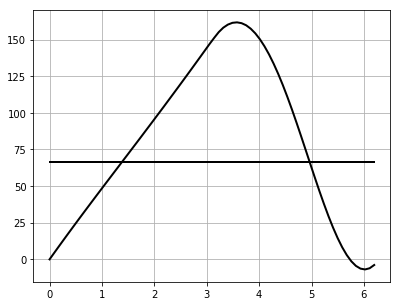

In [54]:
fig4 = plt.figure(figsize=(6.40, 5.00))
varx=arr_phi
vary1 = [((i - (t_max + t_min) / 2) / (omega_mid_1 * j_pr1.n(4)) + omega_mid_1 -12.3) * 250 for i in delta_t_1]

#plt.plot(varx, vary1, linewidth = 2, color = 'black')
plt.plot(varx, [(omega_mid_1 - 12.3 ) * 250 for i in varx], linewidth = 2, color = 'black')
plt.plot(varx, [i / 1000 for i in delta_t_1], linewidth = 2, color = 'black')
plt.grid(True)
plt.show()

In [55]:
#fig4.savefig('delta_t')

In [56]:
(12.3 - 12.852) / 6

In [79]:
(0.366 * (j_pr1) ** 0.2).n(4) ** 3 * 1230

In [80]:
b = (0.437 * (j_pr1) ** 0.2).n(4) * 0.2

In [81]:
d2 = (0.437 * (j_pr1) ** 0.2).n(4) * 0.8

In [83]:
d1 = (0.437 * (j_pr1) ** 0.2).n(4)

In [2]:
(50525 - 50153) / 50153 * 100

0.7417303052658863